In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Excel Data

In [3]:
df=pd.read_excel('data.xlsx')

To show Data Frame

In [4]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,0-2,yes,2,left,right_up,no,recurrence-events


Shape of the Data Frame i.e., No.of Rows & Columns in the Data Frame

In [5]:
df.shape

(286, 10)

To Check the Null values using info function

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    285 non-null    object
 4   node-caps    286 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  286 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


Again to check Null values using isnull function

In [7]:
pd.isnull(df)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
281,False,False,False,False,False,False,False,False,False,False
282,False,False,False,False,False,False,False,False,False,False
283,False,False,False,False,False,False,False,False,False,False
284,False,False,False,False,False,False,False,False,False,False


Sum the null values for each columns

In [8]:
pd.isnull(df).sum()

age            0
menopause      0
tumor-size     0
inv-nodes      1
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

Remove the Null value row using dropna function and use (inplace=True) to save this

In [9]:
df.dropna(inplace=True)

Now check shape and Null values of the Data Frame

In [10]:
df.shape

(285, 10)

In [11]:
pd.isnull(df).sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

Sort data by age group

In [12]:
df = pd.DataFrame(df)
df_sorted = df.sort_values('age')

In [13]:
df_sorted.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
131,20-29,premeno,35-39,0-2,no,2,right,right_up,no,no-recurrence-events
123,30-39,premeno,35-39,0-2,yes,3,left,left_low,no,recurrence-events
261,30-39,premeno,25-29,0-2,no,1,left,central,no,no-recurrence-events
35,30-39,premeno,15-19,0-2,no,1,left,left_low,no,no-recurrence-events
124,30-39,premeno,30-34,0-2,no,2,left,right_low,no,no-recurrence-events


# LEVEL - I

Which age group is highly and lowly affected by breast cancer?

In [14]:
age_count=df_sorted['age'].value_counts().reset_index().sort_values(by='age', ascending=True)
age_count

,age,count
5,20-29,1
3,30-39,36
1,40-49,90
0,50-59,96
2,60-69,56
4,70-79,6


In [15]:
df_sort = age_count.sort_values(by='count', ascending=False)
highest_count_age_group = df_sort.iloc[0]['age']
lowest_count_age_group = df_sort.iloc[-1]['age']
print("The age group highly affected by breast cancer is:", highest_count_age_group)
print("The age group lowly affected by breast cancer is:", lowest_count_age_group)

The age group highly affected by breast cancer is: 50-59
The age group lowly affected by breast cancer is: 20-29


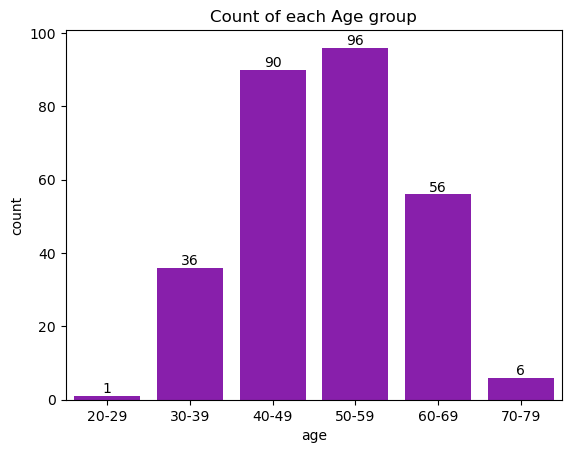

In [16]:
age_count_plt=sns.countplot(x='age',data=df_sorted,color="#9308c2")
for bars in age_count_plt.containers:
    age_count_plt.bar_label(bars)
    age_count_plt.set_title('Count of each Age group')

How many patients have undergone premeno,ge40 and lt40?

In [17]:
premeno_count = df_sorted[df_sorted['menopause'] == 'premeno'].shape[0]
lt40_count = df_sorted[df_sorted['menopause'] == 'lt40'].shape[0]
ge40_count = df_sorted[df_sorted['menopause'] == 'ge40'].shape[0]

print("Number of patients who have undergone prmeno:", premeno_count)
print("Number of patients who have undergone ge40:", ge40_count)
print("Number of patients who have undergone lt40:", lt40_count)

#Or

menopause_count=df_sorted['menopause'].value_counts().reset_index().sort_values(by='count', ascending=True)
menopause_count

Number of patients who have undergone prmeno: 150
Number of patients who have undergone ge40: 128
Number of patients who have undergone lt40: 7


,menopause,count
2,lt40,7
1,ge40,128
0,premeno,150


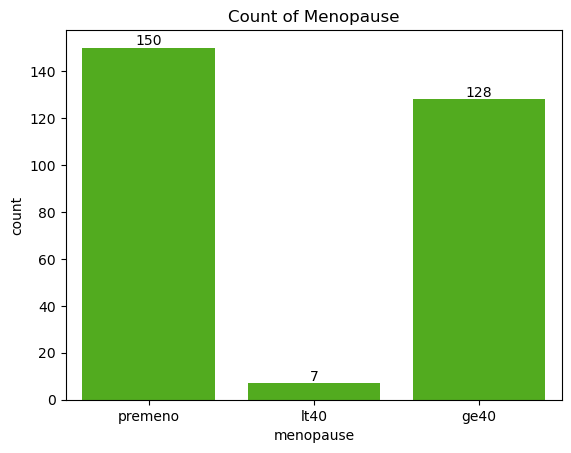

In [18]:
menopause_count_plt=sns.countplot(x='menopause',data=df_sorted,color="#4cc208")
for bars in menopause_count_plt.containers:
    menopause_count_plt.bar_label(bars)
    menopause_count_plt.set_title('Count of Menopause')

Count the each degree of malignancy (1,2,3) (less aggressive, moderate aggressive, higly aggressive tumor or cancer)

In [19]:
deg_malig_count=df_sorted['deg-malig'].value_counts().reset_index().sort_values(by='count', ascending=True)
deg_malig_count

,deg-malig,count
2,1,71
1,3,85
0,2,129


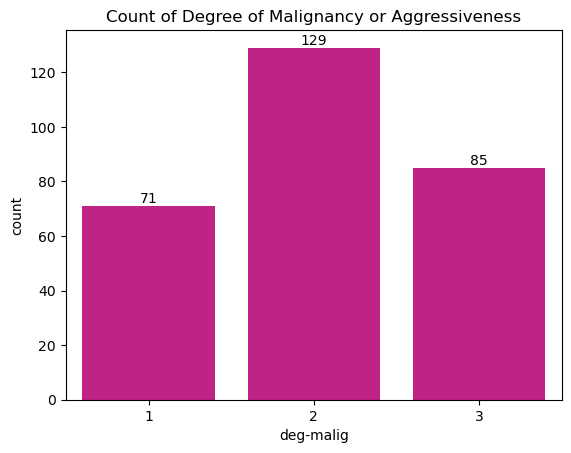

In [20]:
deg_malig_count_plt=sns.countplot(x='deg-malig',data=df_sorted,color="#d9098c")
for bars in deg_malig_count_plt.containers:
    deg_malig_count_plt.bar_label(bars)
    deg_malig_count_plt.set_title('Count of Degree of Malignancy or Aggressiveness')

Number of Breast Cancer in each position (Right and Left)

In [21]:
position_count=df_sorted['breast'].value_counts().reset_index().sort_values(by='count',ascending=True)
position_count

,breast,count
1,right,133
0,left,152


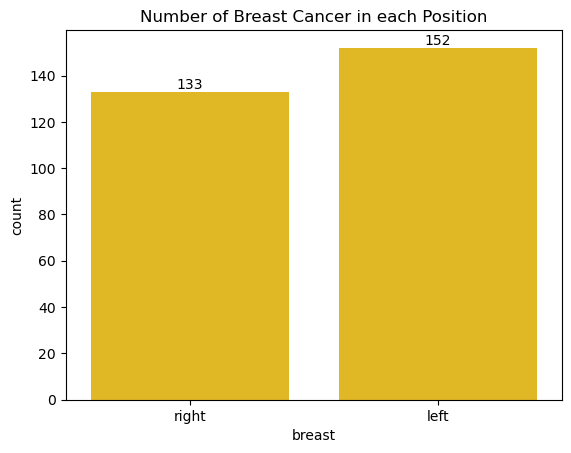

In [22]:
position_count_plot=sns.countplot(data=df_sorted,x='breast',color='#ffc905')
for bars in position_count_plot.containers:
    position_count_plot.bar_label(bars)
    position_count_plot.set_title('Number of Breast Cancer in each Position')

Number of counts in each Breast Quad

In [23]:
quad_count=df_sorted['breast-quad'].value_counts().reset_index().sort_values(by='count',ascending=True)
quad_count

,breast-quad,count
4,central,21
3,right_low,24
2,right_up,32
1,left_up,97
0,left_low,111


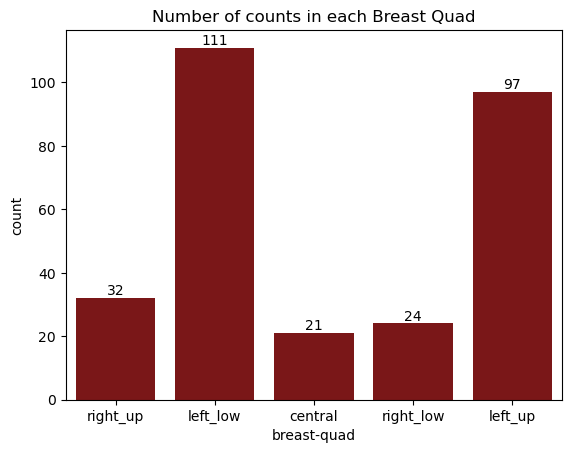

In [24]:
quad_count_plot=sns.countplot(data=df_sorted,x='breast-quad',color='#8a0608')
for bars in quad_count_plot.containers:
    quad_count_plot.bar_label(bars)
    quad_count_plot.set_title('Number of counts in each Breast Quad')

Count number of patients have irradiat or not

In [25]:
irradiat_count=df_sorted['irradiat'].value_counts().reset_index().sort_values(by='count',ascending=True)
irradiat_count

,irradiat,count
1,yes,68
0,no,217


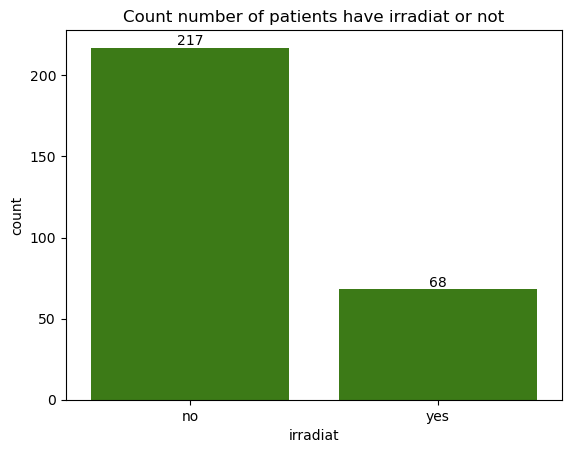

In [26]:
irradiat_count_plot=sns.countplot(data=df_sorted,x='irradiat',color='#388a06')
for bars in irradiat_count_plot.containers:
    irradiat_count_plot.bar_label(bars)
    irradiat_count_plot.set_title('Count number of patients have irradiat or not')

Count Number of recurrence and no recurence events

In [27]:
class_count=df_sorted['Class'].value_counts().reset_index().sort_values(by='count',ascending=True)
class_count

,Class,count
1,recurrence-events,85
0,no-recurrence-events,200


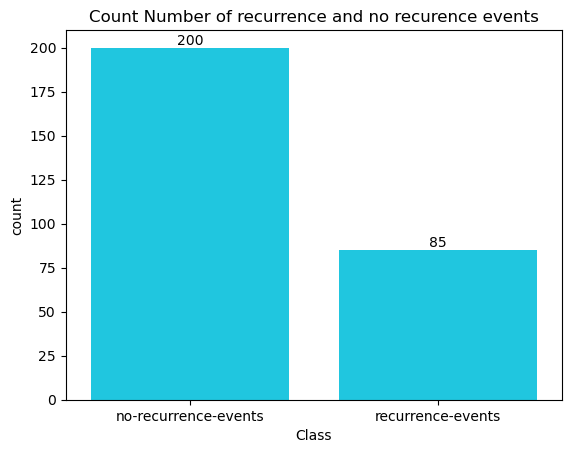

In [28]:
class_count_plot=sns.countplot(data=df_sorted,x='Class',color='#00ddff')
for bars in class_count_plot.containers:
    class_count_plot.bar_label(bars)
    class_count_plot.set_title('Count Number of recurrence and no recurence events')

Count Number of each Tumor size

In [29]:
tumor_size_count=df_sorted['tumor-size'].value_counts().reset_index().sort_values(by='count',ascending=True)
tumor_size_count

,tumor-size,count
8,45-49,7
7,50-54,9
6,0-4,13
5,35-39,20
4,40-44,23
3,15-19,38
2,20-24,56
1,25-29,58
0,30-34,61


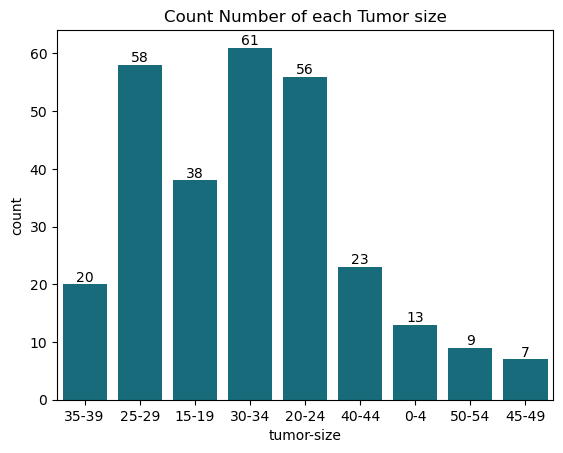

In [30]:
tumor_size_count_plot=sns.countplot(data=df_sorted,x='tumor-size',color='#06768a')
for bars in tumor_size_count_plot.containers:
    tumor_size_count_plot.bar_label(bars)
    tumor_size_count_plot.set_title('Count Number of each Tumor size')

Count Number of each Involve Nodes

In [31]:
inv_node_count=df_sorted['inv-nodes'].value_counts().reset_index().sort_values(by='count',ascending=True)
inv_node_count

,inv-nodes,count
3,24-26,1
4,22-24,1
2,14-16,2
1,15-17,20
0,0-2,261


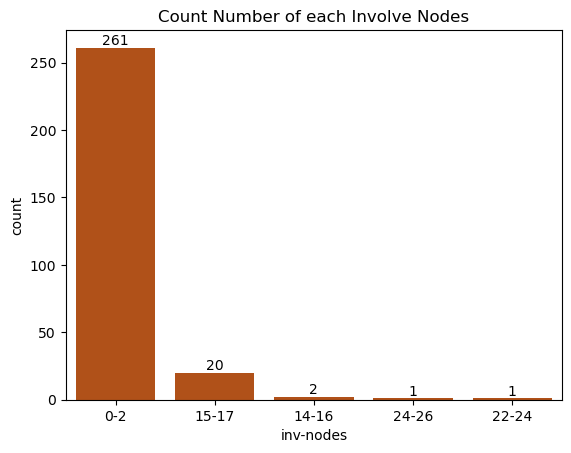

In [32]:
inv_node_count_plot=sns.countplot(data=df_sorted,x='inv-nodes',color='#c94a00')
for bars in inv_node_count_plot.containers:
    inv_node_count_plot.bar_label(bars)
    inv_node_count_plot.set_title('Count Number of each Involve Nodes')

Count Number of each Nodes caps

In [33]:
node_caps_count=df_sorted['node-caps'].value_counts().reset_index().sort_values(by='count',ascending=True)
node_caps_count

,node-caps,count
1,yes,61
0,no,224


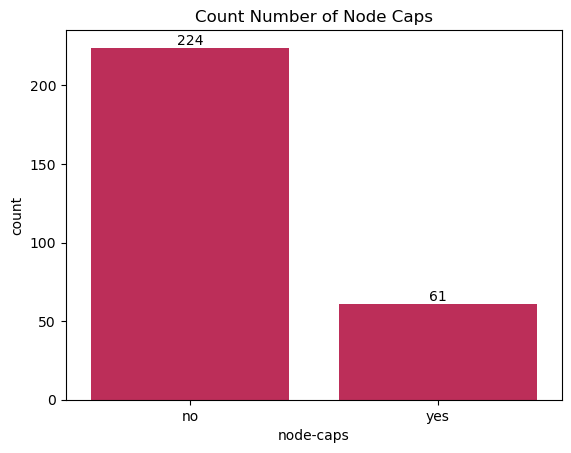

In [34]:
node_caps_count_plot=sns.countplot(data=df_sorted,x='node-caps',color='#d31750')
for bars in node_caps_count_plot.containers:
    node_caps_count_plot.bar_label(bars)
    node_caps_count_plot.set_title('Count Number of Node Caps')

# LEVEL - II

Number of patients have undergone premeno,ge40 and lt40 for each age group

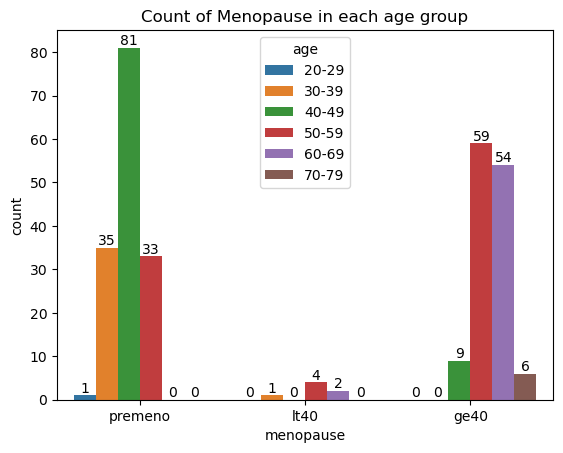

In [35]:
menopause_count_plt=sns.countplot(x='menopause',data=df_sorted, hue='age')
for bars in menopause_count_plt.containers:
    menopause_count_plt.bar_label(bars)
    menopause_count_plt.set_title('Count of Menopause in each age group')

Count the each degree of malignancy (1,2,3) (less aggressive, moderate aggressive, higly aggressive tumor or cancer) for each age group

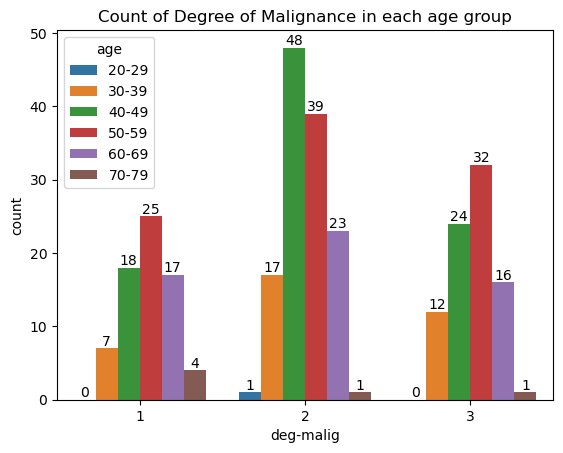

In [36]:
deg_malig_count_plt=sns.countplot(x='deg-malig',data=df_sorted, hue='age')
for bars in deg_malig_count_plt.containers:
    deg_malig_count_plt.bar_label(bars)
    deg_malig_count_plt.set_title('Count of Degree of Malignance in each age group')

Number of Breast Cancer in each position (Right and Left) for each age group

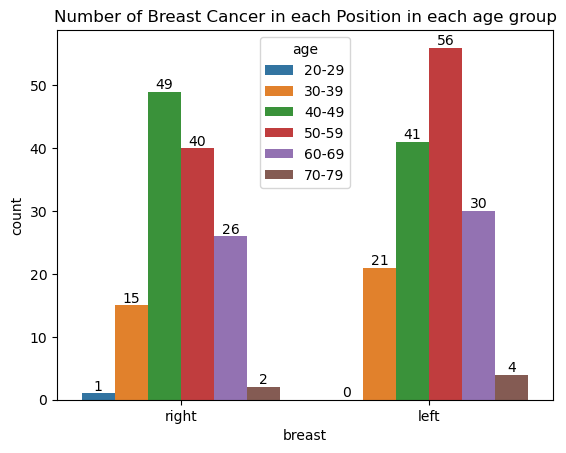

In [37]:
position_count_plot=sns.countplot(data=df_sorted,x='breast', hue='age')
for bars in position_count_plot.containers:
    position_count_plot.bar_label(bars)
    position_count_plot.set_title('Number of Breast Cancer in each Position in each age group')

Number of Breast Quad in each age group 

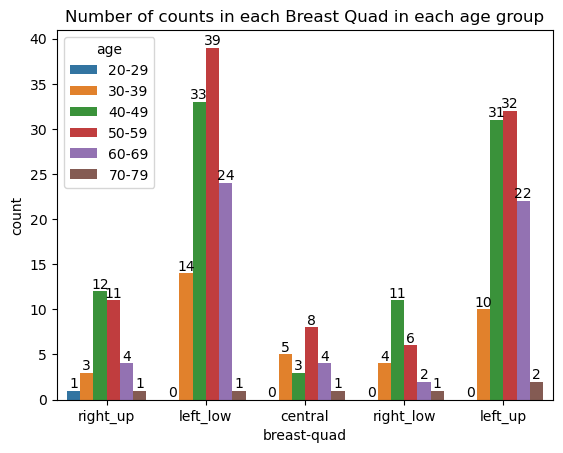

In [38]:
quad_count_plot=sns.countplot(data=df_sorted,x='breast-quad', hue='age')
for bars in quad_count_plot.containers:
    quad_count_plot.bar_label(bars)
    quad_count_plot.set_title('Number of counts in each Breast Quad in each age group')

Count number of patients have irradiat or not in each age group

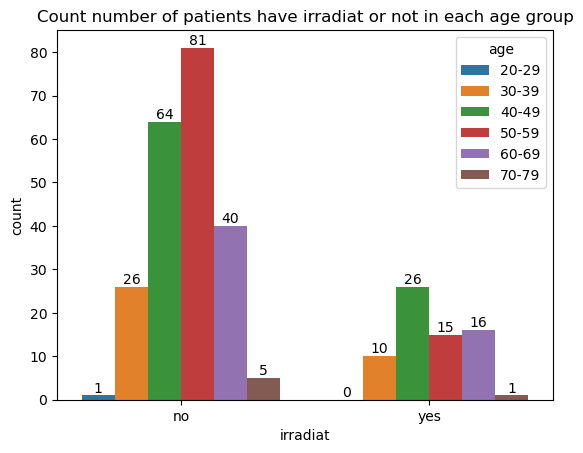

In [39]:
irradiat_count_plot=sns.countplot(data=df_sorted,x='irradiat', hue='age')
for bars in irradiat_count_plot.containers:
    irradiat_count_plot.bar_label(bars)
    irradiat_count_plot.set_title('Count number of patients have irradiat or not in each age group')

Number of recurrence and no recurence events in eaach age group

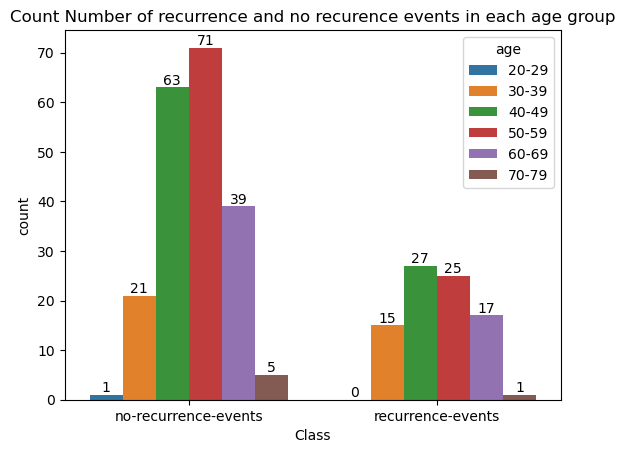

In [40]:
class_count_plot=sns.countplot(data=df_sorted,x='Class', hue='age')
for bars in class_count_plot.containers:
    class_count_plot.bar_label(bars)
    class_count_plot.set_title('Count Number of recurrence and no recurence events in each age group')

Count Number of each Tumor size in each age group

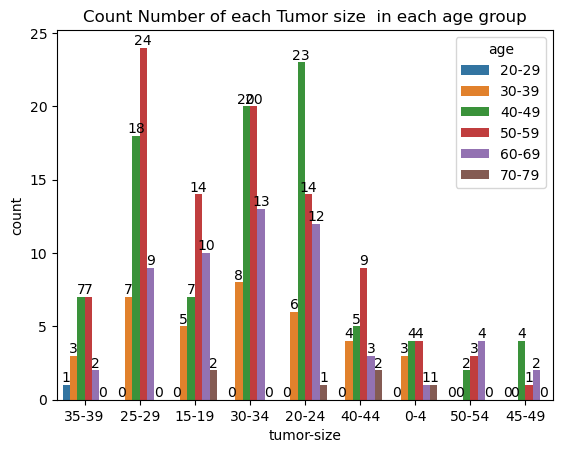

In [41]:
tumor_size_count_plot=sns.countplot(data=df_sorted,x='tumor-size', hue='age')
for bars in tumor_size_count_plot.containers:
    tumor_size_count_plot.bar_label(bars)
    tumor_size_count_plot.set_title('Count Number of each Tumor size  in each age group')

Count Number of each Involve Nodes in each age group

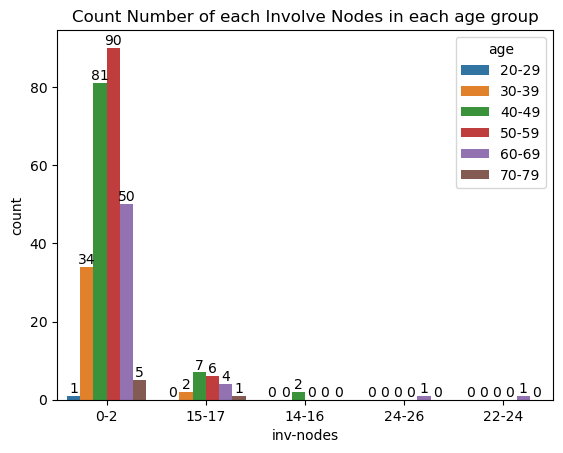

In [42]:
inv_node_count_plot=sns.countplot(data=df_sorted,x='inv-nodes', hue='age')
for bars in inv_node_count_plot.containers:
    inv_node_count_plot.bar_label(bars)
    inv_node_count_plot.set_title('Count Number of each Involve Nodes in each age group')

Count Number of node caps in each age group

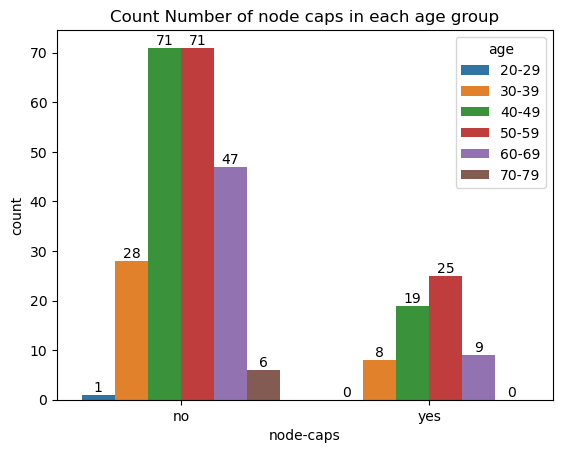

In [43]:
node_caps_count_plot=sns.countplot(data=df_sorted,x='node-caps', hue='age')
for bars in node_caps_count_plot.containers:
    node_caps_count_plot.bar_label(bars)
    node_caps_count_plot.set_title('Count Number of node caps in each age group')

# LEVEL - III

What is the average age of the breast cancer patients?

In [44]:
Mid_val= df_sorted['age'].apply(lambda x: sum(map(int, x.split('-'))) / 2)
mean = Mid_val.mean()
print("The average age of the breast cancer patients:", mean)

The average age of the breast cancer patients: 51.09649122807018


What is the average age of the breast cancer patients with premeno?

In [45]:
premeno_count = df_sorted[df_sorted['menopause'] == 'premeno'].groupby('age').size().reset_index(name='count')
premeno_count

,age,count
0,20-29,1
1,30-39,35
2,40-49,81
3,50-59,33


In [46]:
Mid_val= premeno_count['age'].apply(lambda x: sum(map(int, x.split('-'))) / 2)
mean = Mid_val.mean()
print("The average age of the breast cancer patients with premeno is:", mean)

The average age of the breast cancer patients with premeno is: 39.5


Correlation Matrix

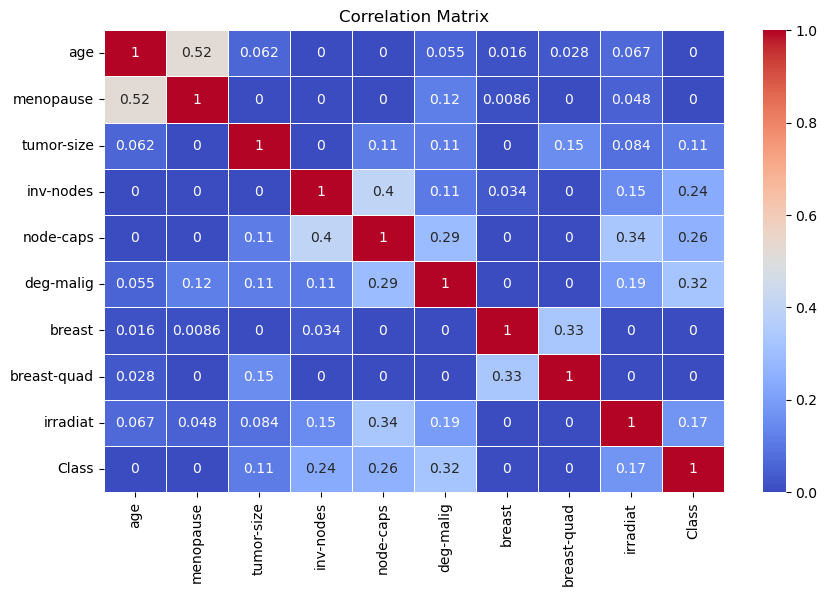

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Custom function to calculate Cramér's V
def cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


df = pd.DataFrame(df_sorted)

# Calculate the correlation matrix
num_vars = len(df.columns)
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

for i in range(num_vars):
    for j in range(num_vars):
        if i == j:
            corr_matrix.iloc[i, j] = 1.0
        else:
            contingency_table = pd.crosstab(df.iloc[:, i], df.iloc[:, j])
            corr_matrix.iloc[i, j] = cramers_v(contingency_table)

# Convert correlation matrix values to numeric format
corr_matrix = corr_matrix.astype(float)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()